# **Исследование заведений общественного питания в г.Москва для "Shut Up and Take My Money"**

**Описание и цели проекта:**

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.

Нам необходимо подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

Нам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Учитываем, что информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

**Описание данных:**

name — название заведения;

address — адрес заведения;

category — категория заведения, например «кафе», «пиццерия» или «кофейня»;

hours — информация о днях и часах работы;

lat — широта географической точки, в которой находится заведение;

lng — долгота географической точки, в которой находится заведение;

rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);

price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;

avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
- «Средний счёт: 1000–1500 ₽»;
- «Цена чашки капучино: 130–220 ₽»;
- «Цена бокала пива: 400–600 ₽».
и так далее;

middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
- Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.

middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
- Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
- 0 — заведение не является сетевым
- 1 — заведение является сетевым

district — административный район, в котором находится заведение, например Центральный административный округ;

seats — количество посадочных мест.

**План работы:**

- Загрузим и изучим данные
- Проведем предобработку данных
- Проведем исследовательский анализ данных
- Детализируем исследование: открытие кофейни

## **Шаг 1. Загрузка и изучение данных.**

В этом разделе мы изучим общую информацию о данных и ответим на вопросы:
- Сколько заведений представлено?
- Что можно сказать о каждом столбце?
- Значения какого типа они хранят? 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
import math as mth
sns.set_palette("GnBu_d")
import plotly.express as px
import json
from folium import Map, Choropleth
from folium import Marker
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
try:
    data = pd.read_csv('/content/drive/MyDrive/DA/datasets/moscow_places.csv')
except:
    data = pd.read_csv('/datasets/moscow_places.csv')

In [ ]:
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Мы видим, что есть пропуски во многих столбцах, будем разбираться ниже. 
Также необходимо будет изменить тип данных на:
- price - float64
- avg_bill - float64
- seats - int

In [ ]:
data['name'].nunique()

5614

Всего заведений 8406, однако уникальных названий заведений 5614. В датасете представленны сетевые и не сетевые заведения.

In [ ]:
data['category'].value_counts()

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

В датасете имеем 8 категорий заведений.

In [ ]:
data.groupby('name').agg({'name': 'count'}).query('name > 1')

,name
name,
10 Идеальных Пицц,3
18 Грамм,3
7 Сэндвичей,4
8 Вафель,2
9 Bar Coffee,7
...,...
Я люблю суши,4
Ян Примус,3
Яндекс Лавка,69


Тут видим, что у нас 714 наименований сетевых заведений. Однако данные еще не проверены на недостатки. 

## **Шаг 2. Предобработка данных.**

В этом разделе мы проверим качество данных и ответим на вопросы:

- есть ли дубликаты в данных?
- проверим наличие пропусков: встречаются ли они, в каких столбцах? Можно ли их обработать или оставить как есть?

Выполним предобработку данных:
- Создайте столбец street с названиями улиц из столбца с адресом.
- Создайте столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
 - логическое значение True — если заведение работает ежедневно и круглосуточно;
 - логическое значение False — в противоположном случае.

In [ ]:
data.duplicated().sum()

0

In [ ]:
dupl_rows = data[data.duplicated(['name', 'address', 'seats', 'lat', 'lng'])]
dupl_rows

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats


Дубликатов нет, это хорошо.

In [ ]:
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

Пропуски есть, однако я, на данном этапе, приняла решение их не заполнять, т.к. могут исказиться результаты исследования.

In [ ]:
data['street']=[x.split(',')[1] for x in data['address'].values]

In [ ]:
data['is_24'] = data['hours'].str.contains('ежедневно, круглосуточно')

In [ ]:
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица Дыбенко,False
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица Дыбенко,False
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,Клязьминская улица,False
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица Маршала Федоренко,False
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,Правобережная улица,False


Добавила столбцы с названием улиц и отметкой о круглосуточном режиме работы. Эти столбцы пригодятся для дальнейших шагов в исследовании.

## **Шаг 3. Исследовательский анализ данных.**

### 3.1 Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Ответьте на вопрос о распределении заведений по категориям.

In [ ]:
category_count = data.groupby('category').agg({'name': 'count'}).reset_index().sort_values(by='name', ascending=False)
category_count

,category,name
3,кафе,2378
6,ресторан,2043
4,кофейня,1413
0,"бар,паб",765
5,пиццерия,633
2,быстрое питание,603
7,столовая,315
1,булочная,256


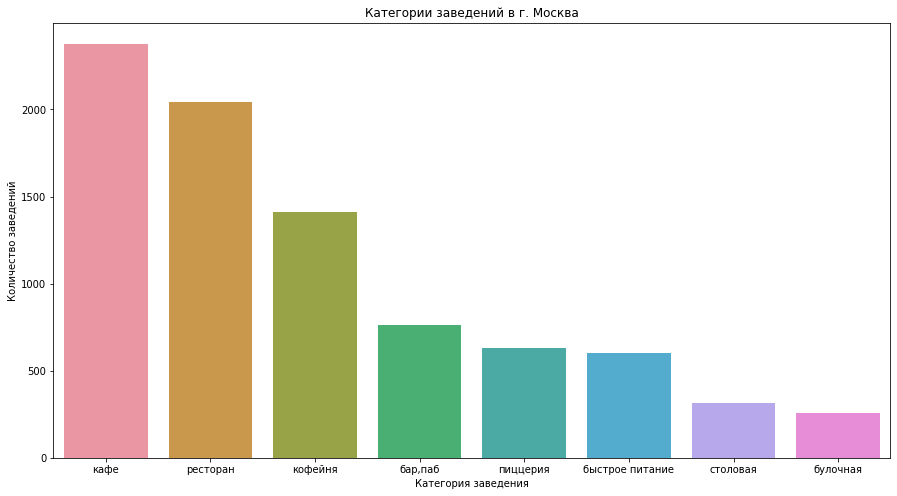

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x='category', y='name', data=category_count).set(title = 'Категории заведений в г. Москва', xlabel = 'Категория заведения', ylabel = 'Количество заведений')
#plt.xticks(rotation=45)
plt.show()


 Мы видим, что наибольшее количество заведений в Москве в категории "кафе", "ресторан" и "кофейня".


### 3.2 Исследуйте количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Проанализируйте результаты и сделайте выводы.

In [ ]:
category_seats = data.groupby('category').agg({'seats': 'median'}).sort_values(by='seats', ascending=False).reset_index()
category_seats 

,category,seats
0,ресторан,86.0
1,"бар,паб",82.5
2,кофейня,80.0
3,столовая,75.5
4,быстрое питание,65.0
5,кафе,60.0
6,пиццерия,55.0
7,булочная,50.0


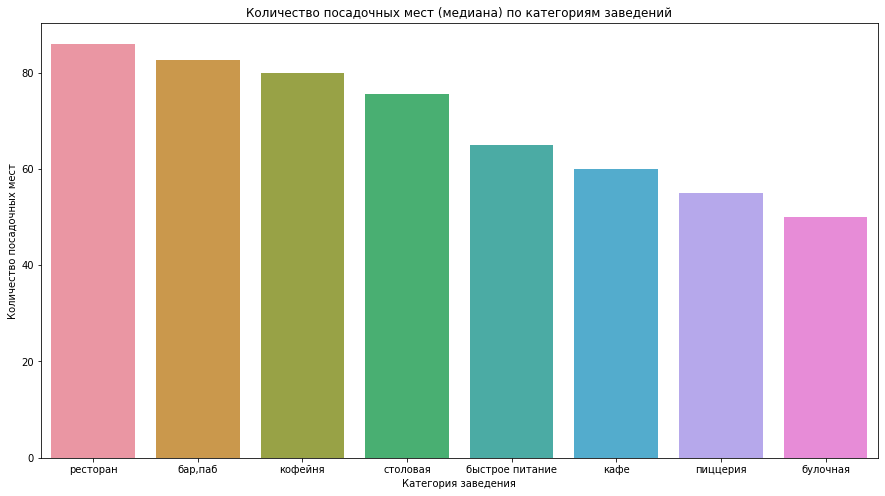

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x='category', y='seats', data=category_seats).set(title = 'Количество посадочных мест (медиана) по категориям заведений', xlabel = 'Категория заведения', ylabel = 'Количество посадочных мест')
plt.show()

Тут мы видим, что медианные значения посадочных мест в различных категориях отличаются незначительно. Это можно объяснить большим количеством футкортов в ТЦ и, например, пиццерий с доставкой, где часто нет зала для посетителей. 

### 3.3 Рассмотрите и изобразите соотношение сетевых и несетевых заведений в датасете. Каких заведений больше?

In [ ]:
chain_count = data.groupby('chain', as_index=False)['name'].count()
chain_count

,chain,name
0,0,5201
1,1,3205


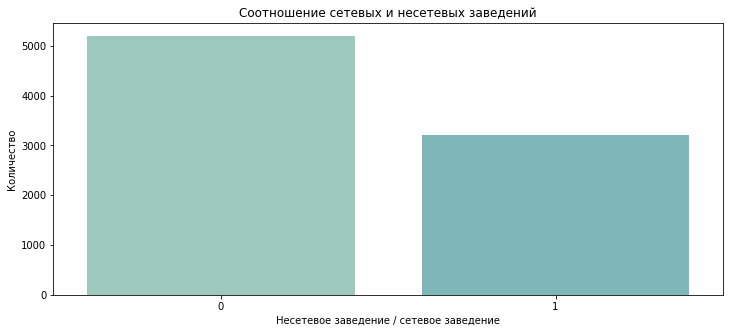

In [ ]:
plt.figure(figsize=(12, 5))
fig = sns.barplot(x='chain',y='name', data=chain_count)
plt.title('Соотношение сетевых и несетевых заведений')
plt.ylabel('Количество')
plt.xlabel('Несетевое заведение / сетевое заведение')
plt.show()

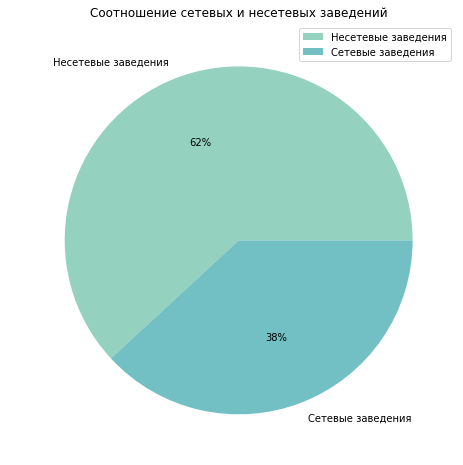

In [ ]:
labels = ["Несетевые заведения", "Сетевые заведения"]
chain_count.plot(kind='pie', y='name', figsize=(8, 8), autopct='%1.0f%%', labels=labels)
plt.title('Соотношение сетевых и несетевых заведений')

plt.legend(['Несетевые заведения', 'Сетевые заведения'])
plt.ylabel(' ')
plt.show()

Несетевых заведений значительно больше, чем сетевых. Посмотрим, как они различаются по категориям.

In [ ]:
category_chain0 = data.query('chain == 0')
category_chain0 = category_chain0.pivot_table(index=['category'], values='name', aggfunc='count').sort_values(by='name', ascending=False)
category_chain0

,name
category,
кафе,1599
ресторан,1313
кофейня,693
"бар,паб",596
быстрое питание,371
пиццерия,303
столовая,227
булочная,99


In [ ]:
category_chain1 = data.query('chain == 1')
category_chain1 = category_chain1.pivot_table(index=['category'], values='name', aggfunc='count').sort_values(by='name', ascending=False)
category_chain1

,name
category,
кафе,779
ресторан,730
кофейня,720
пиццерия,330
быстрое питание,232
"бар,паб",169
булочная,157
столовая,88


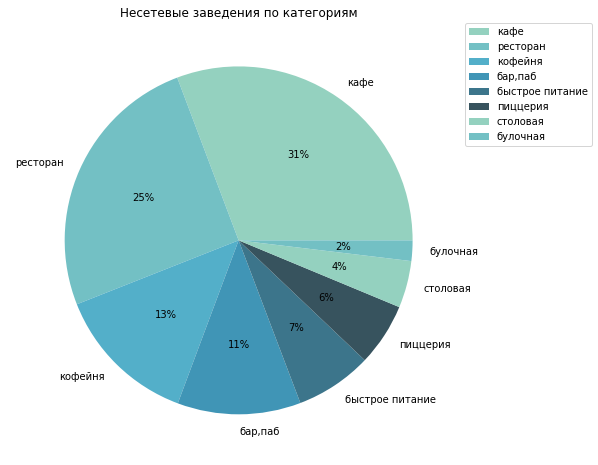

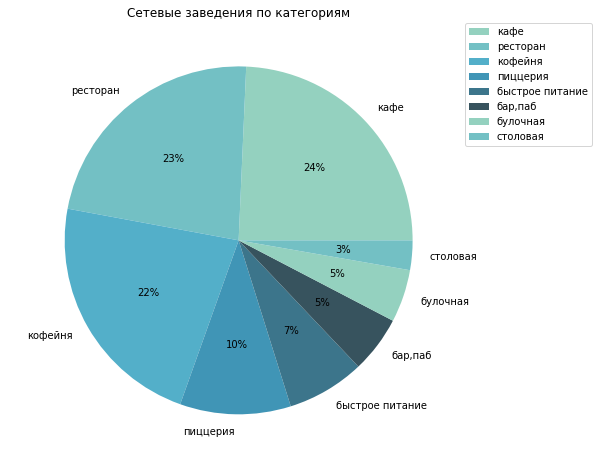

In [ ]:
category_chain0.plot(kind='pie', y='name', figsize=(8, 8), autopct='%1.0f%%')
plt.title('Несетевые заведения по категориям')
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0)
plt.ylabel(' ')
plt.show()

category_chain1.plot(kind='pie', y='name', figsize=(8, 8), autopct='%1.0f%%',)
plt.title('Сетевые заведения по категориям')
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0)
plt.ylabel(' ')
plt.show()


Мы видим, что как в сетевых так и в несетевых - преобладают категории "кафе" и "ресторан". Однако стоит отметить, что % сетевых кофеен больше, чем несетевых.

In [ ]:
category_chain0 = category_chain0.reset_index()
category_chain1 = category_chain1.reset_index()

fig = make_subplots(rows=1, cols=2,specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=category_chain0['name'],
     labels=category_chain0['category'],
     title="Несетевые заведения по категориям"),
     row=1, col=1)

fig.add_trace(go.Pie(
     values=category_chain1['name'],
     labels=category_chain1['category'],
     title="Сетевые заведения по категориям",
     text=category_chain0['category']), 
     row=1, col=2)

fig.show()

In [ ]:
ch_categ = data.groupby('category')['chain'].count().reset_index().sort_values(by='chain', ascending=False)

ch_categ0 = data.query('chain == 0').groupby('category')['chain'].count()

ch_categ1 = data.query('chain == 1').groupby('category')['chain'].count()

ch_categ_rate0 = ch_categ.merge(ch_categ0, left_on='category', right_on='category', how='left', suffixes=['_all', '_1'])
ch_categ_rate0['chain_perc'] = (ch_categ_rate0['chain_1'] / ch_categ_rate0['chain_all'] * 100).round(2)
ch_categ_rate0 = ch_categ_rate0.sort_values(by='chain_perc', ascending=False)

ch_categ_rate1 = ch_categ.merge(ch_categ1, left_on='category', right_on='category', how='left', suffixes=['_all', '_1'])
ch_categ_rate1['chain_perc'] = (ch_categ_rate1['chain_1'] / ch_categ_rate1['chain_all'] * 100).round(2)
ch_categ_rate1 = ch_categ_rate1.sort_values(by='chain_perc', ascending=False)


In [ ]:
ch_categ_rate0

,category,chain_all,chain_1,chain_perc
3,"бар,паб",765,596,77.91
6,столовая,315,227,72.06
0,кафе,2378,1599,67.24
1,ресторан,2043,1313,64.27
5,быстрое питание,603,371,61.53
2,кофейня,1413,693,49.04
4,пиццерия,633,303,47.87
7,булочная,256,99,38.67


In [ ]:
ch_categ_rate1

,category,chain_all,chain_1,chain_perc
7,булочная,256,157,61.33
4,пиццерия,633,330,52.13
2,кофейня,1413,720,50.96
5,быстрое питание,603,232,38.47
1,ресторан,2043,730,35.73
0,кафе,2378,779,32.76
6,столовая,315,88,27.94
3,"бар,паб",765,169,22.09


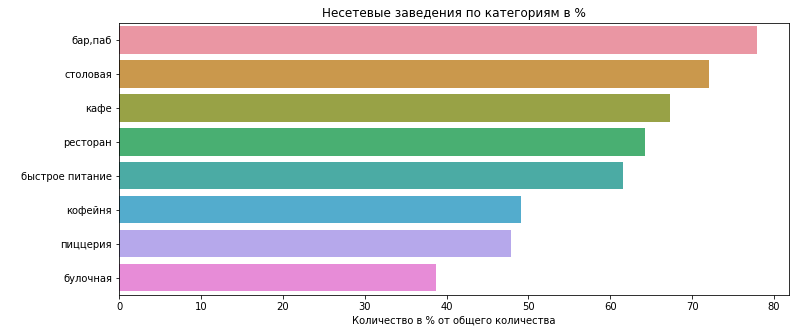

In [ ]:
plt.figure(figsize=(12, 5))
fig = sns.barplot(x='chain_perc',y='category', data=ch_categ_rate0)
plt.title('Несетевые заведения по категориям в %')
plt.ylabel(' ')
plt.xlabel('Количество в % от общего количества')
plt.show()

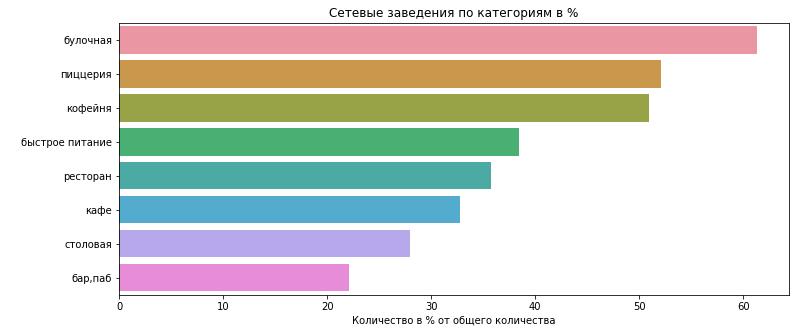

In [ ]:
plt.figure(figsize=(12, 5))
fig = sns.barplot(x='chain_perc',y='category', data=ch_categ_rate1)
plt.title('Сетевые заведения по категориям в %')
plt.ylabel(' ')
plt.xlabel('Количество в % от общего количества')
plt.show()

На графиках мы видим, что заведения в категории "паб\бар" чаще всего бывают несетевыми. А "булочные" чаще всего сетевыми.

### 3.4 Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.

In [ ]:
category_chain = data.pivot_table(index=['category','chain'], values='name', aggfunc='count').query('chain > 0').sort_values(by='name', ascending=False).reset_index()
category_chain

,category,chain,name
0,кафе,1,779
1,ресторан,1,730
2,кофейня,1,720
3,пиццерия,1,330
4,быстрое питание,1,232
5,"бар,паб",1,169
6,булочная,1,157
7,столовая,1,88


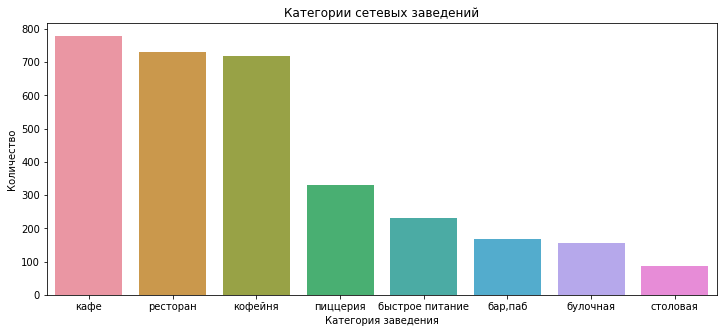

In [ ]:
plt.figure(figsize=(12, 5))
fig = sns.barplot(x='category',y='name', data=category_chain)
plt.title('Категории сетевых заведений')
plt.ylabel('Количество')
plt.xlabel('Категория заведения')
plt.show()

In [ ]:
ch_categ_rate1

,category,chain_all,chain_1,chain_perc
7,булочная,256,157,61.33
4,пиццерия,633,330,52.13
2,кофейня,1413,720,50.96
5,быстрое питание,603,232,38.47
1,ресторан,2043,730,35.73
0,кафе,2378,779,32.76
6,столовая,315,88,27.94
3,"бар,паб",765,169,22.09


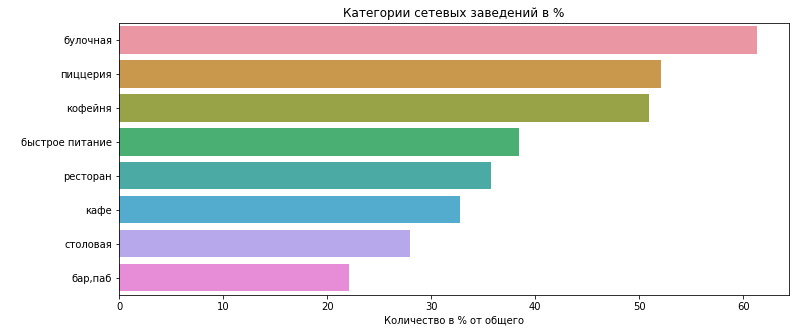

In [ ]:
plt.figure(figsize=(12, 5))
fig = sns.barplot(x='chain_perc',y='category', data=ch_categ_rate1)
plt.title('Категории сетевых заведений в %')
plt.xlabel('Количество в % от общего')
plt.ylabel(' ')
plt.show()

Чаще всего заведения в категориях: "булочная", "пиццерия" и "кофейня" являются сетевыми.

### 3.5 Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Под популярностью понимается количество заведений этой сети в регионе. Постройте подходящую для такой информации визуализацию. Знакомы ли вам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся?

In [ ]:
top_15 = data[data['chain']==1].pivot_table(index = ['name','category'], values ='district', aggfunc='count').rename(columns = {'district': 'count'}).sort_values(by='count',ascending=False).head(15).reset_index()
top_15

,name,category,count
0,Шоколадница,кофейня,119
1,Домино'с Пицца,пиццерия,76
2,Додо Пицца,пиццерия,74
3,One Price Coffee,кофейня,71
4,Яндекс Лавка,ресторан,69
5,Cofix,кофейня,65
6,Prime,ресторан,49
7,КОФЕПОРТ,кофейня,42
8,Кулинарная лавка братьев Караваевых,кафе,39
9,Теремок,ресторан,36


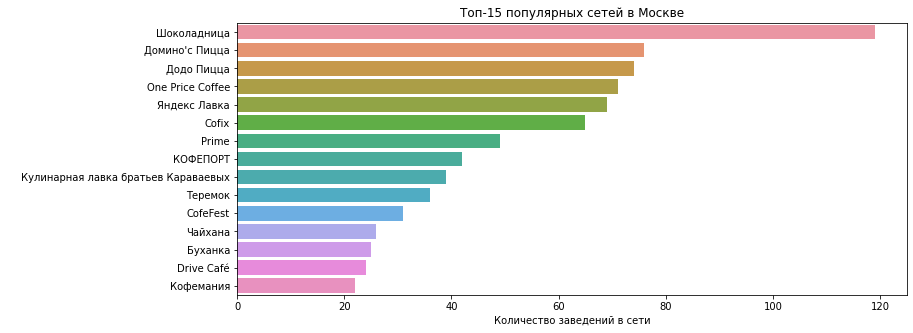

In [ ]:
plt.figure(figsize=(12, 5))
fig = sns.barplot(x='count',y='name', data=top_15)
plt.title('Топ-15 популярных сетей в Москве')
plt.ylabel(' ')
plt.xlabel('Количество заведений в сети')
plt.show()

Это исследование показало, что самая популярное сетевое заведение в Москве - Шоколадница. Это сеть кофеен. Менее популярное - пиццерии Домино'с Пицца и Додо Пицца. Есть вопросы к Яндекс Лавке. Это доставка продуктов.

In [ ]:
top_15_category = top_15.groupby('category')['name'].agg(name='count')
top_15_category

,name
category,
булочная,1
кафе,3
кофейня,6
пиццерия,2
ресторан,3


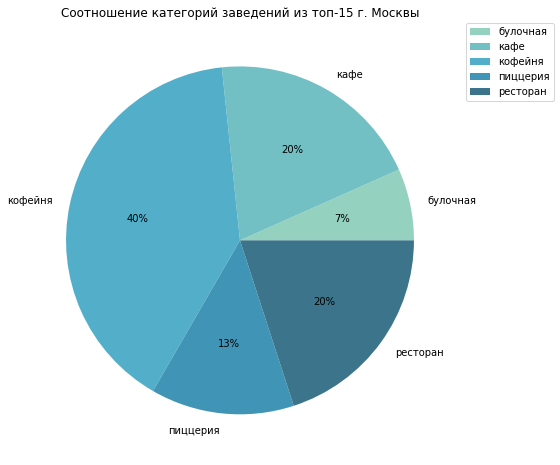

In [ ]:
top_15_category.plot(kind='pie', y='name', figsize=(8, 8), autopct='%1.0f%%')
plt.title('Соотношение категорий заведений из топ-15 г. Москвы')
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0)
plt.ylabel(' ')
plt.show()

На диаграмме видно, что большую часть (40%) из топ-15 популярных заведений это "кофейни".

### 3.6 Какие административные районы Москвы присутствуют в датасете? Отобразите общее количество заведений и количество заведений каждой категории по районам. Попробуйте проиллюстрировать эту информацию одним графиком.

In [ ]:
districts = data.pivot_table(index=['district', 'category'], values='name', aggfunc='count').rename(columns={'name': 'count'}).reset_index()
districts

,district,category,count
0,Восточный административный округ,"бар,паб",53
1,Восточный административный округ,булочная,25
2,Восточный административный округ,быстрое питание,71
3,Восточный административный округ,кафе,272
4,Восточный административный округ,кофейня,105
...,...,...,...
67,Южный административный округ,кафе,264
68,Южный административный округ,кофейня,131
69,Южный административный округ,пиццерия,73
70,Южный административный округ,ресторан,202


In [ ]:
fig = px.bar(districts, x='count', y='district', color='category', text_auto = True, title='Количество заведений по категориям и районам г.Москвы', labels = {'district': ' ', 'count': 'Количество заведений'})
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
plt.figure(figsize=(15, 15))
fig = px.sunburst(districts, path=['district', 'category'], values='count', title = 'Заведения по категориям и районам г.Москвы', width = 820, height = 820, labels = {'labels': 'Категория заведения', 'count': 'Количество заведений','parent': 'Район'})
fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<Figure size 1080x1080 with 0 Axes>

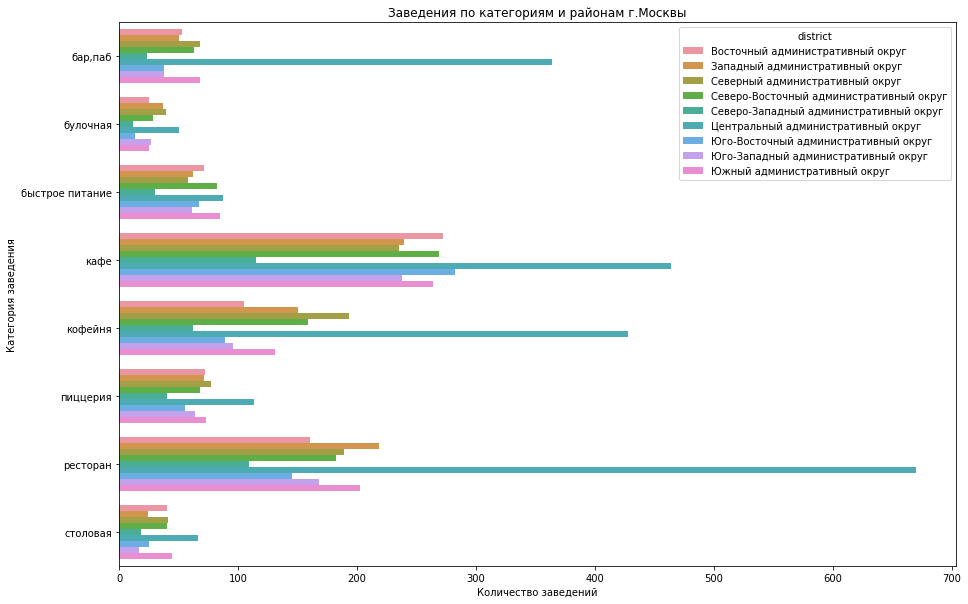

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='count', y='category', hue='district', data=districts) 
plt.title('Заведения по категориям и районам г.Москвы')
plt.ylabel('Категория заведения')
plt.xlabel('Количество заведений')
plt.show()

На этих графиках видно, что лидером среди округов по количеству заведений является Центральный административный округ, что не удивительно.

### 3.7 Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?

In [ ]:
rating_category = data.groupby('category').agg({'rating': 'mean'}).sort_values(by='rating', ascending=False).reset_index()
rating_category

,category,rating
0,"бар,паб",4.387712
1,пиццерия,4.301264
2,ресторан,4.290357
3,кофейня,4.277282
4,булочная,4.268359
5,столовая,4.211429
6,кафе,4.123886
7,быстрое питание,4.050249


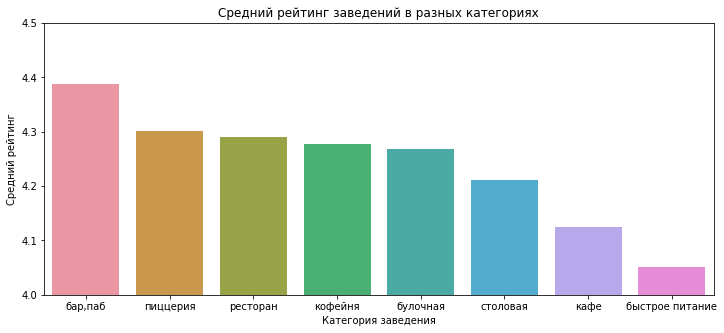

In [ ]:
plt.figure(figsize=(12, 5))
fig = sns.barplot(x='category',y='rating', data=rating_category)
plt.ylim(4, 4.5)
plt.title('Средний рейтинг заведений в разных категориях')
plt.ylabel('Средний рейтинг')
plt.xlabel('Категория заведения')
plt.show()

Мы видим, что средний рейтинг заведений не сильно отличается по всем категориям. Однако стоит отметить, что наименьший средний рейтинг заведений в категории "быстрое питание". А вот в барах и пабах средний рейтинг выше всех:)

### 3.8 Постройте фоновую картограмму (хороплет) со средним рейтингом заведений каждого района..

In [ ]:
rating_district = data.groupby('district').agg({'rating': 'mean'}).sort_values(by='rating', ascending=False).reset_index()
rating_district

,district,rating
0,Центральный административный округ,4.377520
1,Северный административный округ,4.239778
2,Северо-Западный административный округ,4.208802
3,Южный административный округ,4.184417
4,Западный административный округ,4.181551
5,Восточный административный округ,4.174185
6,Юго-Западный административный округ,4.172920
7,Северо-Восточный административный округ,4.148260
8,Юго-Восточный административный округ,4.101120


In [ ]:
with open('/content/drive/MyDrive/DA/datasets/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

print(json.dumps(geo_json, indent=2, ensure_ascii=False, sort_keys=True))

{
  "features": [
    {
      "geometry": {
        "coordinates": [
          [
            [
              [
                37.8756653,
                55.825342400000004
              ],
              [
                37.876001599999995,
                55.8249027
              ],
              [
                37.8730967,
                55.8237936
              ],
              [
                37.8689418,
                55.8228697
              ],
              [
                37.869206999999996,
                55.822363200000005
              ],
              [
                37.868322500000005,
                55.822211100000004
              ],
              [
                37.867472,
                55.823703
              ],
              [
                37.86851090000001,
                55.82391880000001
              ],
              [
                37.87046039999999,
                55.8242706
              ],
              [
                37.87172779999

In [ ]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/content/drive/MyDrive/DA/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_district,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

Средний рейтинг у заведений расположенных в Центральном административном округе выше, чем в других районах, хоть и незначительно.

### 3.9 Отобразите все заведения датасета на карте с помощью кластеров средствами библиотеки folium.

In [ ]:
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его на карту
def create_marker(row):
    Marker([row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}"
    ).add_to(m)

# применяем функцию для создания маркера ко всем строкам датафрейма
data.apply(create_marker, axis=1)
    
# выводим карту
m

Output hidden; open in https://colab.research.google.com to view.

### 3.10 Найдите топ-15 улиц по количеству заведений. Постройте график распределения количества заведений и их категорий по этим улицам. Попробуйте проиллюстрировать эту информацию одним графиком.

In [ ]:
top_street = data.pivot_table(index=['street', 'category'], values='name', aggfunc='count').rename(columns={'name': 'count'})
top_street = top_street.sort_values(by='count', ascending=False).head(15).reset_index()
top_street

,street,category,count
0,проспект Мира,кафе,53
1,проспект Мира,ресторан,45
2,МКАД,кафе,45
3,проспект Мира,кофейня,36
4,Профсоюзная улица,кафе,35
5,проспект Вернадского,ресторан,33
6,Ленинский проспект,ресторан,33
7,Люблинская улица,кафе,26
8,Профсоюзная улица,ресторан,26
9,Ленинский проспект,кафе,26


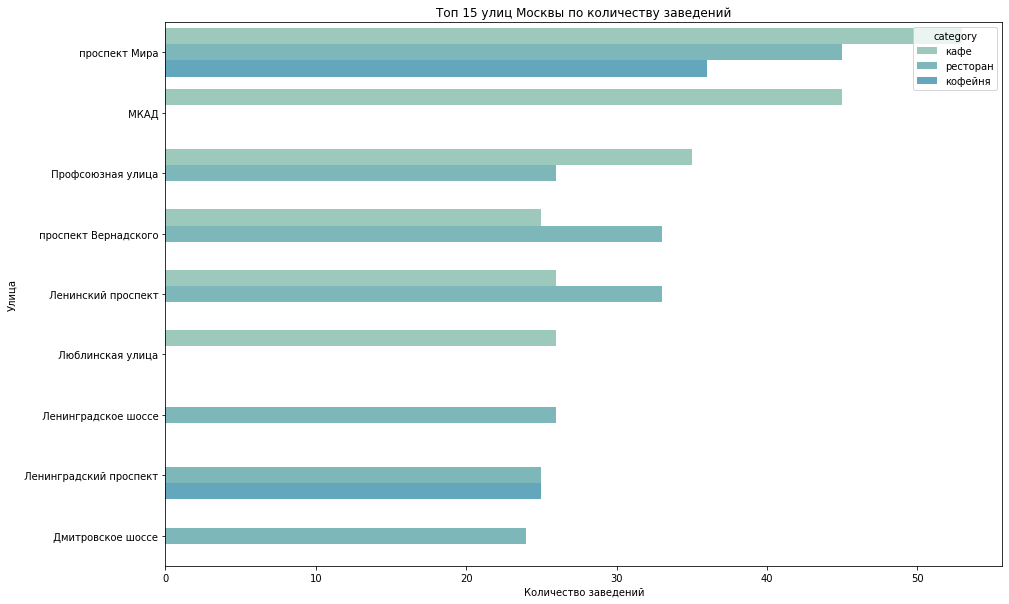

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='count', y='street', hue='category', data=top_street) 
plt.title('Топ 15 улиц Москвы по количеству заведений')
plt.ylabel('Улица')
plt.xlabel('Количество заведений')
plt.show()

Тут мы видим топ 15 улиц с наибольшим количеством заведений. На втором месте МКАД, вероятнее всего это связано с большим количеством больших ТЦ.

### 3.11 Найдите улицы, на которых находится только один объект общепита. Что можно сказать об этих заведениях?

In [ ]:
street_one = data.groupby('street')['category'].agg(name='count').rename(columns = {'name': 'count'})
street_one = street_one.query('count == 1').reset_index()
street_one

,street,count
0,1-й Автозаводский проезд,1
1,1-й Балтийский переулок,1
2,1-й Варшавский проезд,1
3,1-й Вешняковский проезд,1
4,1-й Голутвинский переулок,1
...,...,...
453,улица Шкулёва,1
454,улица Шкулёва 4,1
455,улица Шухова,1
456,улица Юннатов,1


In [ ]:
street_one_district = street_one.merge(data[['street', 'district']], how='left', on='street')['district'].value_counts()
street_one_district.to_frame()

,district
Центральный административный округ,145
Северо-Восточный административный округ,55
Северный административный округ,52
Восточный административный округ,52
Южный административный округ,43
Юго-Восточный административный округ,39
Западный административный округ,35
Северо-Западный административный округ,19
Юго-Западный административный округ,18


В нашем датасете 458 улиц, где расположено только одно заведение общественного питания. Больше всего в Центральном административном округе.

### 3.12 Значения средних чеков заведений хранятся в столбце middle_avg_bill. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитайте медиану этого столбца для каждого района. Используйте это значение в качестве ценового индикатора района. Постройте фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?

In [ ]:
district_bill = data.groupby('district')['middle_avg_bill'].agg(middle_avg_bill='median').reset_index()
district_bill

,district,middle_avg_bill
0,Восточный административный округ,575.0
1,Западный административный округ,1000.0
2,Северный административный округ,650.0
3,Северо-Восточный административный округ,500.0
4,Северо-Западный административный округ,700.0
5,Центральный административный округ,1000.0
6,Юго-Восточный административный округ,450.0
7,Юго-Западный административный округ,600.0
8,Южный административный округ,500.0


In [ ]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/content/drive/MyDrive/DA/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=district_bill,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

Лидерами по среднему чеку являются Центральный и Западный административные округи. Это можно объяснить сравнительно небольшим количеством жилых районов и, соответственно, преобладание финансово обеспеченной публики.

### Общий вывод

На основании проведенного исследования можно сделать следующие выводы:

- наибольшее количество заведений в Москве в категории "кафе", "ресторан" и "кофейня";

- медианные значения посадочных мест в различных категориях отличаются незначительно; 

- несетевых заведений значительно больше, чем сетевых;

- в сетевых и несетевых заведениях преобладают категории "кафе" и "ресторан", однако % сетевых кофеен больше, чем несетевых;

- заведения из категории "паб/бар" на 80% несетевые, а "булочные" в 60% случаев сетевые;

- среди сетевых заведений наибольшее количество заведений категории "кафе", "ресторан" и "кофейня";

- самая популярное сетевое заведение в Москве - сеть кофеен Шоколадница;

- 40% из топ-15 популярных заведений это "кофейни";

- Центральный административный округ лидер среди округов по количеству заведений;

- средний рейтинг заведений не сильно отличается по всем категориям;

- найдены топ 15 улиц с наибольшим количеством заведений;

- найдены 458 улиц, где расположено только одно заведение общественного питания;

- лидерами по среднему чеку являются Центральный и Западный административные округи.

## **Шаг 4. Открытие кофейни.**

### Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?

In [ ]:
cafe = data.query('category == "кофейня"').reset_index()
cafe.head()

,index,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24
0,3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица Маршала Федоренко,False
1,25,В парке вкуснее,кофейня,"Москва, парк Левобережный",Северный административный округ,"ежедневно, 10:00–21:00",55.878453,37.460028,4.3,NaN,NaN,NaN,NaN,1,NaN,парк Левобережный,False
2,45,9 Bar Coffee,кофейня,"Москва, Коровинское шоссе, 41, стр. 1",Северный административный округ,пн-пт 08:00–18:00,55.885837,37.513422,4.0,NaN,NaN,NaN,NaN,1,46.0,Коровинское шоссе,False
3,46,CofeFest,кофейня,"Москва, улица Маршала Федоренко, 6с1",Северный административный округ,пн-пт 09:00–19:00,55.879934,37.492522,3.6,NaN,NaN,NaN,NaN,1,NaN,улица Маршала Федоренко,False
4,52,Cofix,кофейня,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 08:00–22:00",55.878531,37.479395,3.8,NaN,NaN,NaN,NaN,1,NaN,улица Дыбенко,False


In [ ]:
cafe['name'].count()

1413

In [ ]:
cafe_districts = cafe.pivot_table(index=['district'], values='name', aggfunc='count').rename(columns={'name': 'count'}).sort_values(by='count', ascending=False)
cafe_districts

,count
district,
Центральный административный округ,428
Северный административный округ,193
Северо-Восточный административный округ,159
Западный административный округ,150
Южный административный округ,131
Восточный административный округ,105
Юго-Западный административный округ,96
Юго-Восточный административный округ,89
Северо-Западный административный округ,62


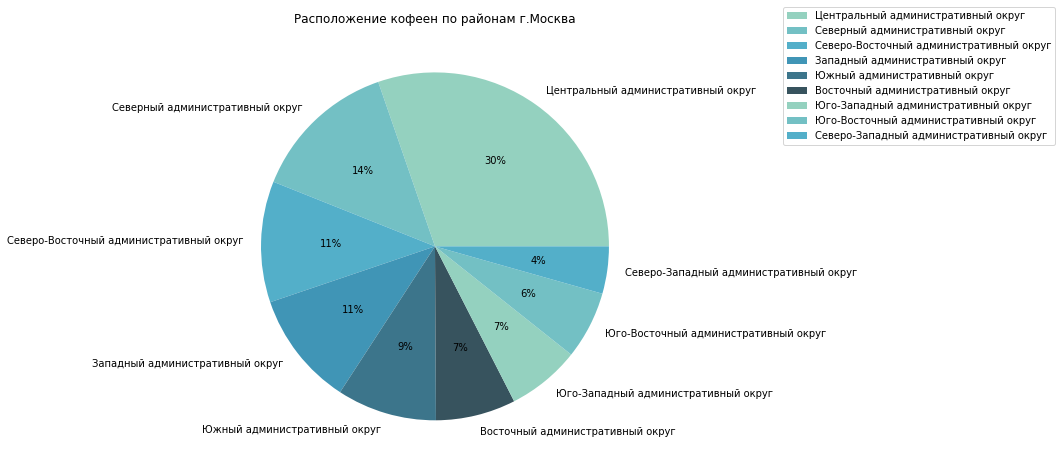

In [ ]:
cafe_districts.plot(kind='pie', y='count', figsize=(8, 8), autopct='%1.0f%%')
plt.title('Расположение кофеен по районам г.Москва')
plt.legend(bbox_to_anchor=( 1.3 , 1.05 ), loc='upper left', borderaxespad= 0)
plt.ylabel(' ')
plt.show()

Мы видим, что лидером по количеству кофеен также является Центральный административный округ. Это с уверенностью можно объяснить обилием бизнес-центром и туристических мест.

### Есть ли круглосуточные кофейни?

In [ ]:
cafe24 = cafe.query('is_24 == True').reset_index()
cafe24.head()

,level_0,index,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24
0,26,200,Wild Bean,кофейня,"Москва, Дмитровское шоссе, 107Е",Северный административный округ,"ежедневно, круглосуточно",55.878477,37.543426,3.5,NaN,NaN,NaN,NaN,1,20.0,Дмитровское шоссе,True
1,153,971,Wild Bean Cafe,кофейня,"Москва, Ярославское шоссе, 116",Северо-Восточный административный округ,"ежедневно, круглосуточно",55.867822,37.708853,4.0,NaN,NaN,NaN,NaN,1,25.0,Ярославское шоссе,True
2,170,1047,Wild Bean Cafe,кофейня,"Москва, Ярославское шоссе, вл3с3",Северо-Восточный административный округ,"ежедневно, круглосуточно",55.851778,37.676423,4.5,NaN,Цена чашки капучино:140–200 ₽,NaN,170.0,1,NaN,Ярославское шоссе,True
3,192,1214,Wild Bean Cafe,кофейня,"Москва, МКАД, 65-й километр, 8",Северо-Западный административный округ,"ежедневно, круглосуточно",55.813787,37.390701,4.3,NaN,NaN,NaN,NaN,1,NaN,МКАД,True
4,204,1291,Шоколадница,кофейня,"Москва, улица Народного Ополчения, 49, корп. 1",Северо-Западный административный округ,"ежедневно, круглосуточно",55.794815,37.494834,4.2,средние,Средний счёт:650–850 ₽,750.0,NaN,1,200.0,улица Народного Ополчения,True


In [ ]:
cafe24['name'].count()

59

Всего 59 кофеен из 1413 - круглосуточные.

In [ ]:
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его на карту
def create_marker(row):
    Marker([row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}"
    ).add_to(m)

# применяем функцию для создания маркера ко всем строкам датафрейма
cafe24.apply(create_marker, axis=1)
    
# выводим карту
m

In [ ]:
cafe24_districts = cafe24.pivot_table(index=['district', 'chain'], values='name', aggfunc='count').rename(columns={'name': 'count'}).sort_values(by='chain', ascending=False)
cafe24_districts

,,count
district,chain,
Восточный административный округ,1,5
Западный административный округ,1,8
Северный административный округ,1,5
Северо-Восточный административный округ,1,3
Северо-Западный административный округ,1,2
Центральный административный округ,1,20
Юго-Восточный административный округ,1,1
Юго-Западный административный округ,1,5
Южный административный округ,1,1


Так же видно, что почти все круглосуточные кофейни являются сетевыми.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Отлично видно!
</div>

### Какие у кофеен рейтинги? Как они распределяются по районам?

In [ ]:
rating_cafe = cafe.pivot_table(index='district', values='rating', aggfunc='mean').sort_values(by='rating', ascending=False).reset_index()
rating_cafe

,district,rating
0,Центральный административный округ,4.336449
1,Северо-Западный административный округ,4.325806
2,Северный административный округ,4.291710
3,Юго-Западный административный округ,4.283333
4,Восточный административный округ,4.282857
5,Южный административный округ,4.232824
6,Юго-Восточный административный округ,4.225843
7,Северо-Восточный административный округ,4.216981
8,Западный административный округ,4.195333


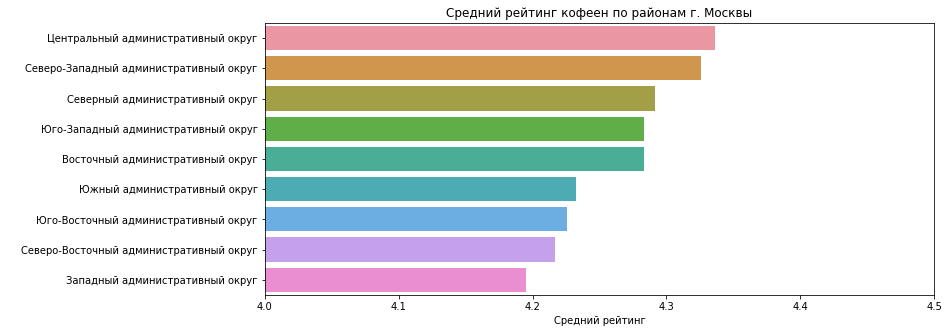

In [ ]:
plt.figure(figsize=(12, 5))
fig = sns.barplot(x='rating',y='district', data=rating_cafe)
plt.xlim(4, 4.5)
plt.title('Средний рейтинг кофеен по районам г. Москвы')
plt.ylabel(' ')
plt.xlabel('Средний рейтинг')
plt.show()

Самый высокий средний рейтинг у кофеен в Центральном и Северо-Западном административных округах.

### На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

In [ ]:
cafe['middle_coffee_cup'].median()

170.0

In [ ]:
cup_cap = cafe.pivot_table(index='district', values='middle_coffee_cup', aggfunc='median').sort_values(by='middle_coffee_cup', ascending=False).reset_index()
cup_cap

,district,middle_coffee_cup
0,Юго-Западный административный округ,198.0
1,Центральный административный округ,190.0
2,Западный административный округ,189.0
3,Северо-Западный административный округ,165.0
4,Северо-Восточный административный округ,162.5
5,Северный административный округ,159.0
6,Южный административный округ,150.0
7,Юго-Восточный административный округ,147.5
8,Восточный административный округ,135.0


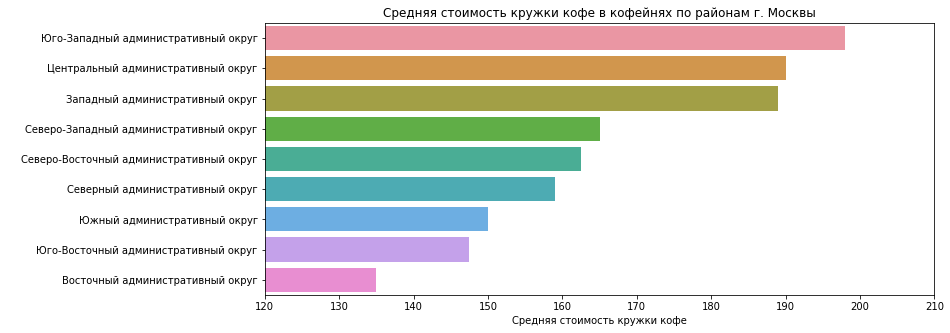

In [ ]:
plt.figure(figsize=(12, 5))
fig = sns.barplot(x='middle_coffee_cup',y='district', data=cup_cap)
plt.xlim(120, 210)
plt.title('Средняя стоимость кружки кофе в кофейнях по районам г. Москвы')
plt.ylabel(' ')
plt.xlabel('Средняя стоимость кружки кофе')
plt.show()

Стоимость кружки кофе, на которую следует ориентироваться зависит от района расположения кофейни, расположенных поблизости бизнес-центров и тп, однако по Москве медианная стоимость составляет 170 руб, можно от нее отталкиваться. Лидер по стоимости кружки кофе - Юго-Западный административный округ (198 руб.). Не сильно отстают Центральный и Западный административные округа (190 и 189 руб.)


In [ ]:
cup_cap_chain = cafe.pivot_table(index=['district', 'chain'], values='middle_coffee_cup', aggfunc='median').sort_values(by='chain', ascending=False).reset_index()
cup_cap_chain0 = cup_cap_chain.query('chain == 0').sort_values(by='middle_coffee_cup', ascending=False).reset_index()
cup_cap_chain1 = cup_cap_chain.query('chain == 1').sort_values(by='middle_coffee_cup', ascending=False).reset_index()
cup_cap_chain0

,index,district,chain,middle_coffee_cup
0,11,Центральный административный округ,0,195.0
1,14,Юго-Западный административный округ,0,190.5
2,15,Западный административный округ,0,170.0
3,16,Южный административный округ,0,170.0
4,10,Северо-Западный административный округ,0,165.0
5,12,Северный административный округ,0,165.0
6,9,Северо-Восточный административный округ,0,162.5
7,13,Юго-Восточный административный округ,0,150.0
8,17,Восточный административный округ,0,135.0


In [ ]:
cup_cap_chain1

,index,district,chain,middle_coffee_cup
0,8,Западный административный округ,1,222.5
1,2,Юго-Западный административный округ,1,199.5
2,4,Центральный административный округ,1,180.0
3,0,Северо-Западный административный округ,1,172.0
4,1,Северо-Восточный административный округ,1,162.0
5,7,Северный административный округ,1,140.0
6,5,Восточный административный округ,1,135.0
7,3,Юго-Восточный административный округ,1,130.0
8,6,Южный административный округ,1,109.5


In [ ]:
fig = make_subplots(rows=1, cols=2,specs=[[{"type": "bar"}, {"type": "bar"}]])

fig.add_trace(go.Bar(name = 'Несетевые кофейни',
     y=cup_cap_chain0['middle_coffee_cup'],
     x=cup_cap_chain0['district']),
     row=1, col=1)

fig.add_trace(go.Bar(name = 'Сетевые кофейни',
     y=cup_cap_chain1['middle_coffee_cup'],
     x=cup_cap_chain1['district']), 
     row=1, col=2)
fig.update_layout(title_text='Средняя стоимость кружки кофе в кофейнях в г. Москва', title_font_size=30)
fig.show()

А вот если смотреть среднюю стоимость кружки кофе среди сетевых и несетевых кофеен, хорошо видно разницу: в сетевых лидирует Западный административный округ (222 руб.).

### Постройте визуализации. Попробуйте дать рекомендацию для открытия нового заведения. Это творческое задание: здесь нет правильного или неправильного ответа, но ваше решение должно быть чем-то обосновано. Объяснить свою рекомендацию можно текстом с описанием или маркерами на географической карте.

In [ ]:
cafe_sw = cafe.query('district == "Юго-Западный административный округ"').reset_index()
cafe_sw.head()

,level_0,index,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24
0,1047,5736,Название Забыл,кофейня,"Москва, Ленинский проспект, 86",Юго-Западный административный округ,"пн-пт 08:20–21:30; сб,вс 10:00–21:30",55.678236,37.528582,4.7,средние,NaN,NaN,NaN,0,NaN,Ленинский проспект,False
1,1074,5891,FoodMoscowCoffee,кофейня,"Москва, Ленинский проспект (дублёр)",Юго-Западный административный округ,"ежедневно, круглосуточно",55.703333,37.573414,4.1,NaN,NaN,NaN,NaN,0,NaN,Ленинский проспект (дублёр),True
2,1075,5892,Cafe Pantheon,кофейня,"Москва, Ленинский проспект, 34/1",Юго-Западный административный округ,"пн-пт 08:30–21:30; сб,вс 10:00–22:00",55.706335,37.576358,4.6,средние,Цена чашки капучино:180–250 ₽,NaN,215.0,0,4.0,Ленинский проспект,False
3,1076,5897,Grinvich Coffee Room,кофейня,"Москва, Ленинский проспект, 34/1",Юго-Западный административный округ,"пн-пт 08:30–21:00; сб,вс 10:00–21:00",55.706723,37.577123,4.6,средние,Цена чашки капучино:230–250 ₽,NaN,240.0,0,4.0,Ленинский проспект,False
4,1077,5898,Tennis Cup Кофе,кофейня,"Москва, Ленинский проспект, 38А",Юго-Западный административный округ,пн-пт 09:00–18:00,55.704550,37.569980,4.4,средние,Средний счёт:200–500 ₽,350.0,NaN,0,NaN,Ленинский проспект,False


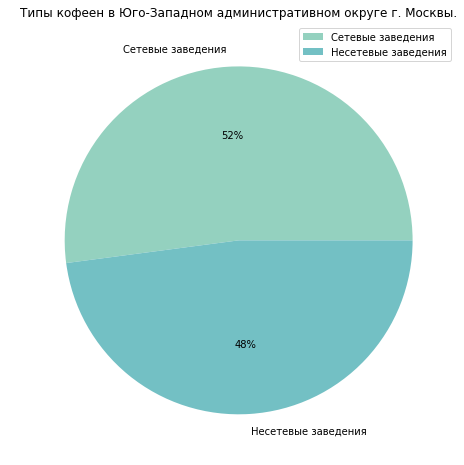

In [ ]:
cafe_sw_chain = cafe_sw.pivot_table(index=['chain'], values='name', aggfunc='count').sort_values(by='name', ascending=False).reset_index()
cafe_sw_chain.plot(kind='pie', y='name', figsize=(8, 8), autopct='%1.0f%%', labels = ['Сетевые заведения', 'Несетевые заведения'])
plt.title('Типы кофеен в Юго-Западном административном округе г. Москвы.')
plt.ylabel(' ')
plt.show()

In [ ]:
cafe_sw_chain

,chain,name
0,1,50
1,0,46


In [ ]:
cafe_sw_24 = cafe_sw.query('is_24 == True')
cafe_sw_24.head()

,level_0,index,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24
1,1074,5891,FoodMoscowCoffee,кофейня,"Москва, Ленинский проспект (дублёр)",Юго-Западный административный округ,"ежедневно, круглосуточно",55.703333,37.573414,4.1,NaN,NaN,NaN,NaN,0,NaN,Ленинский проспект (дублёр),True
16,1098,6032,Шоколадница,кофейня,"Москва, улица Дмитрия Ульянова, 24",Юго-Западный административный округ,"ежедневно, круглосуточно",55.687178,37.573645,4.2,средние,Цена чашки капучино:239–274 ₽,NaN,256.0,1,48.0,улица Дмитрия Ульянова,True
17,1100,6045,Шоколадница,кофейня,"Москва, Профсоюзная улица, 19",Юго-Западный административный округ,"ежедневно, круглосуточно",55.678665,37.564330,4.3,средние,Цена чашки капучино:239–274 ₽,NaN,256.0,1,48.0,Профсоюзная улица,True
26,1117,6125,Шоколадница,кофейня,"Москва, Ленинский проспект, 68/10",Юго-Западный административный округ,"ежедневно, круглосуточно",55.689117,37.545799,4.2,NaN,Цена чашки капучино:239–274 ₽,NaN,256.0,1,96.0,Ленинский проспект,True
43,1186,6558,Wild Bean Cafe,кофейня,"Москва, Ленинский проспект, 137Ас1",Юго-Западный административный округ,"ежедневно, круглосуточно",55.643246,37.471251,4.5,NaN,NaN,NaN,NaN,1,NaN,Ленинский проспект,True


In [ ]:
cafe_sw_24 = cafe_sw.pivot_table(index=['is_24'], values='name', aggfunc='count').sort_values(by='name', ascending=False).reset_index()
cafe_sw_24

,is_24,name
0,False,87
1,True,7


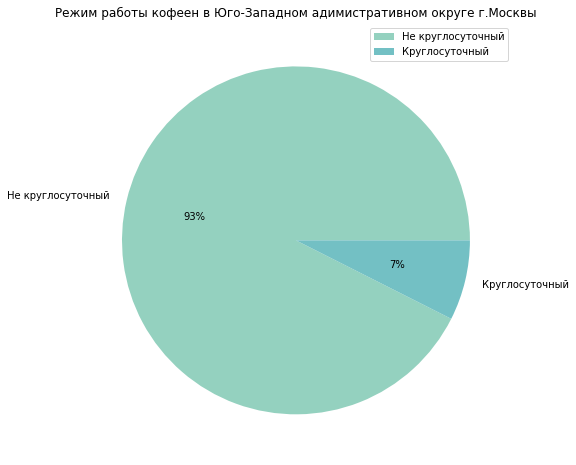

In [ ]:
cafe_sw_24.plot(kind='pie', y='name', figsize=(8, 8), autopct='%1.0f%%', labels = ['Не круглосуточный', 'Круглосуточный'])
plt.title('Режим работы кофеен в Юго-Западном адимистративном округе г.Москвы')
#plt.legend(labels = ['Не круглосуточный', 'Круглосуточный'])
plt.ylabel(' ')
plt.show()

Рекомендации:
- Юго-Западный административный округ (небольшое количество кофеен, платежеспособная публика);
- расположение вблизи бизнес-центров/ВУЗов/туристических мест/метро;
- круглосуточный режим работы (небольшое количество круглосуточно работающих кофеен), но тоже зависит он инфраструктуры.

## **Шаг 5. Презентация.**

[Презентация тут](https://drive.google.com/file/d/1e1ogQEPcqjWoBuTTc4kMIPLUaxzpx5CS/view?usp=sharing)